<a href="https://colab.research.google.com/github/lathamithu/Data_Analytics_Intern/blob/master/Session_14_04_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

In [105]:
data = pd.read_csv('X Y Sinusoid Data.csv')
data.head()

,x,y
0,0.038571,0.066391
1,0.166776,1.027483
2,0.183153,1.245302
3,0.187359,1.004781
4,0.243116,1.264121


In [106]:

x = data.iloc[:,0]
y = data.iloc[:,1]
print (x)
print(y)

0     0.038571
1     0.166776
2     0.183153
3     0.187359
4     0.243116
5     0.289299
6     0.342805
7     0.345499
8     0.386477
9     0.430047
10    0.484498
11    0.491929
12    0.614932
13    0.638054
14    0.697736
15    0.702427
16    0.729086
17    0.873401
18    0.898007
19    0.950964
Name: x, dtype: float64
0     0.066391
1     1.027483
2     1.245302
3     1.004781
4     1.264121
5     0.498330
6     0.597502
7     0.629410
8     0.822705
9     0.557581
10    0.565053
11   -0.393222
12   -0.912892
13   -1.128250
14   -1.110455
15   -0.570343
16   -0.620209
17   -0.873236
18   -0.187472
19   -0.025815
Name: y, dtype: float64


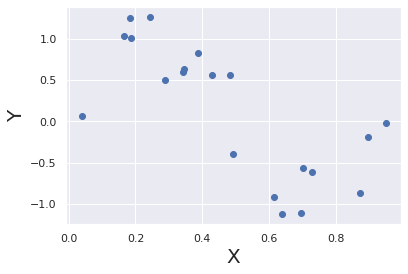

In [107]:
plt.scatter(x,y)
plt.ylabel('Y',fontsize=20)
plt.xlabel('X',fontsize=20)
plt.show()

In [108]:
x1 = sm.add_constant(x)
results = sm.OLS(y,x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     19.83
Date:                Wed, 15 Apr 2020   Prob (F-statistic):           0.000307
Time:                        17:08:36   Log-Likelihood:                -16.030
No. Observations:                  20   AIC:                             36.06
Df Residuals:                      18   BIC:                             38.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1750      0.268      4.380      0.000       0.611       1.739
x             -2.1706      0.487     -4.454      0.000      -3.195      -1.147
==============================================================================
Omnibus:                        1.826   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.401   Jarque-Bera (JB):                1.386
Skew:                          -0.457   Prob(JB):                        0.500
Kurtosis:                       2.089   Cond. No.                         4.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

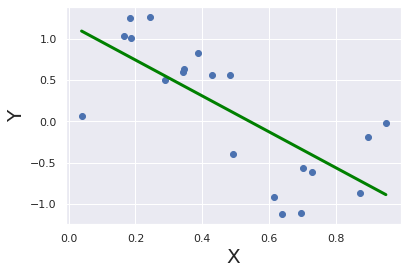

In [110]:
plt.scatter(x,y)
yhat=[]
for q in x:
    yhat.append(1.1750+(-2.1706*q))

fig=plt.plot(x,yhat,lw=3, c='green' , label='regressionline')
plt.ylabel('Y',fontsize=20)
plt.xlabel('X',fontsize=20)
plt.show()

In [0]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Iris data.csv to Iris data (2).csv
User uploaded file "Iris data.csv" with length 4609 bytes


In [93]:
raw_data = pd.read_csv('Iris data.csv')
raw_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [94]:
data = raw_data.copy()
data['species'] = data['species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1,'Iris-virginica':2})
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [95]:
y = data['species']
x1 = data[['sepal_length','sepal_width','petal_length','petal_width']]
x = sm.add_constant(x1)
reg_log = sm.OLS(y,x)
results_log = reg_log.fit()
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                species   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     484.8
Date:                Wed, 15 Apr 2020   Prob (F-statistic):           8.21e-83
Time:                        16:57:59   Log-Likelihood:                 17.468
No. Observations:                 150   AIC:                            -24.94
Df Residuals:                     145   BIC:                            -9.882
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1921      0.205      0.938      0.350      -0.212       0.597
sepal_length    -0.1097      0.058     -1.900      0.059      -0.224       0.004
sepal_width     -0.0442      0.060     -0.738      0.462      -0.163       0.074
petal_length     0.2270      0.057      3.983      0.000       0.114       0.340
petal_width      0.6099      0.094      6.456      0.000       0.423       0.797
==============================================================================
Omnibus:                        0.366   Durbin-Watson:                   1.068
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.138
Skew:                          -0.052   Prob(JB):                        0.933
Kurtosis:                       3.106   Cond. No.                         91.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

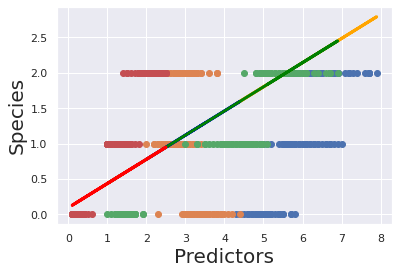

In [99]:
a = data.iloc[:,0]
b = data.iloc[:,1]
c = data.iloc[:,2]
d = data.iloc[:,3]

plt.scatter(a,y)
plt.scatter(b,y)
plt.scatter(c,y)
plt.scatter(d,y)
yhat1=[]
yhat2=[]
yhat3=[]
yhat4=[]
for q in a:
  yhat1.append(0.0960+(-0.0549*q)+(-0.0221*q)+(0.1135*q)+(0.3049*q))
for q in b:
  yhat2.append(0.0960+(-0.0549*q)+(-0.0221*q)+(0.1135*q)+(0.3049*q))
for q in c:
  yhat3.append(0.0960+(-0.0549*q)+(-0.0221*q)+(0.1135*q)+(0.3049*q))
for q in d:
  yhat4.append(0.0960+(-0.0549*q)+(-0.0221*q)+(0.1135*q)+(0.3049*q))

fig=plt.plot(a,yhat1,lw=3, c='orange' , label='regressionline')
fig=plt.plot(b,yhat2,lw=3, c='blue' , label='regressionline')
fig=plt.plot(c,yhat3,lw=3, c='green' , label='regressionline')
fig=plt.plot(d,yhat4,lw=3, c='red' , label='regressionline')
plt.ylabel('Species',fontsize=20)
plt.xlabel('Predictors',fontsize=20)
plt.show()

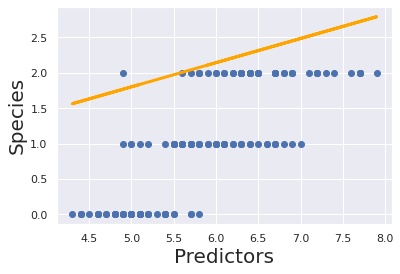

In [100]:
plt.scatter(a,y)

yhat1=[]

for q in a:
  yhat1.append(0.0960+(-0.0549*q)+(-0.0221*q)+(0.1135*q)+(0.3049*q))

fig=plt.plot(a,yhat1,lw=3, c='orange' , label='regressionline')

plt.ylabel('Species',fontsize=20)
plt.xlabel('Predictors',fontsize=20)
plt.show()

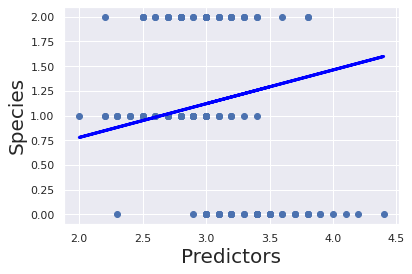

In [101]:
plt.scatter(b,y)

yhat2=[]
for q in b:
  yhat2.append(0.0960+(-0.0549*q)+(-0.0221*q)+(0.1135*q)+(0.3049*q))
fig=plt.plot(b,yhat2,lw=3, c='blue' , label='regressionline')
plt.ylabel('Species',fontsize=20)
plt.xlabel('Predictors',fontsize=20)
plt.show()

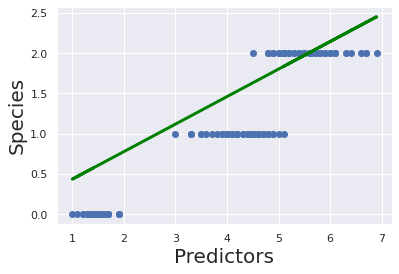

In [102]:
plt.scatter(c,y)
yhat3=[]
for q in c:
  yhat3.append(0.0960+(-0.0549*q)+(-0.0221*q)+(0.1135*q)+(0.3049*q))
fig=plt.plot(c,yhat3,lw=3, c='green' , label='regressionline')
plt.ylabel('Species',fontsize=20)
plt.xlabel('Predictors',fontsize=20)
plt.show()

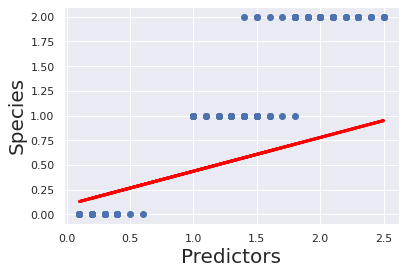

In [103]:

plt.scatter(d,y)

yhat4=[]
for q in d:
  yhat4.append(0.0960+(-0.0549*q)+(-0.0221*q)+(0.1135*q)+(0.3049*q))

fig=plt.plot(d,yhat4,lw=3, c='red' , label='regressionline')
plt.ylabel('Species',fontsize=20)
plt.xlabel('Predictors',fontsize=20)
plt.show()